In [2]:
import os
import re
from bs4 import BeautifulSoup
from tqdm import tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import classification_report

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
df_fake = pd.read_csv('/content/drive/My Drive/mydatasets/fake_news/Fake.csv', header=0)

In [6]:
df_true = pd.read_csv('/content/drive/My Drive/mydatasets/fake_news/True.csv', header=0)

In [7]:
df_fake['label'] = ['Fake' for x in range(0,len(df_fake))]

In [8]:
df_true['label'] = ['True' for x in range(0,len(df_true))]

In [9]:
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [10]:
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [11]:
df = pd.concat([df_fake,df_true]) 

In [14]:
subj_vales_count=df['subject'].value_counts()

In [18]:
subj_vales_count

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

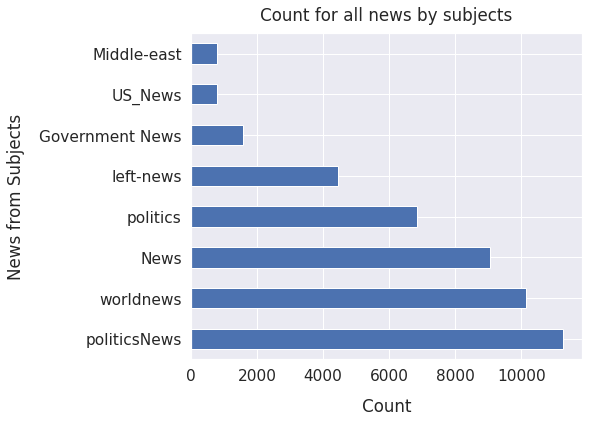

In [28]:
sns.set(font_scale=1.4)
df['subject'].value_counts().plot(kind='barh', figsize=(7, 6), rot=0)
plt.xlabel("Count", labelpad=14)
plt.ylabel("News from Subjects", labelpad=14)
plt.title("Count for all news by subjects", y=1.02);

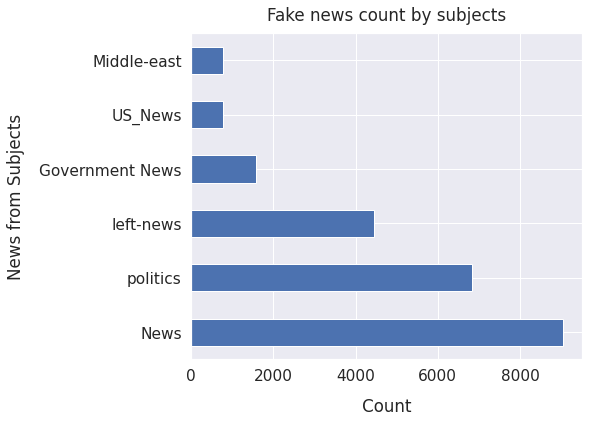

In [29]:
sns.set(font_scale=1.4)
df_fake['subject'].value_counts().plot(kind='barh', figsize=(7, 6), rot=0)
plt.xlabel("Count", labelpad=14)
plt.ylabel("News from Subjects", labelpad=14)
plt.title("Fake news count by subjects", y=1.02);

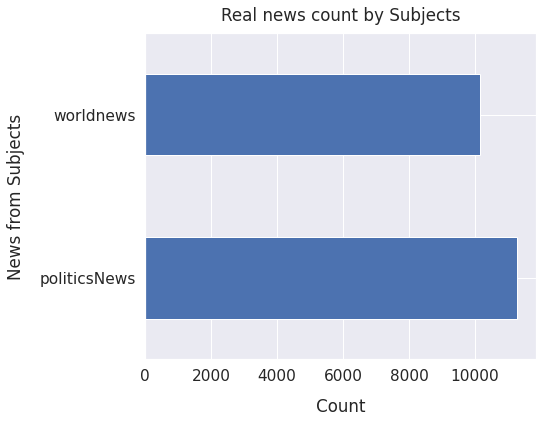

In [31]:
sns.set(font_scale=1.4)
df_true['subject'].value_counts().plot(kind='barh', figsize=(7, 6), rot=0)
plt.xlabel("Count", labelpad=14)
plt.ylabel("News from Subjects", labelpad=14)
plt.title("Real news count by Subjects", y=1.02);

In [47]:
df[['city','news','extras']]=df['text'].str.split('(Reuters)',n=1,expand=True)


In [ ]:
df['city'].str.replace(' \(','')


In [58]:
collection=[]
for cities in df['city']:
   if len(cities.replace(' (',''))>3 and len(cities.replace(' (','')) < 20:
     collection.append(cities.replace(' (',''))

In [ ]:
collection

In [106]:
unique, counts = np.unique(collection, return_counts=True)

In [107]:
count_sort_ind = np.argsort(-counts)
unique = unique[count_sort_ind]
counts= counts[count_sort_ind]

In [113]:
print(counts)

[6390  705  695 ...    1    1    1]


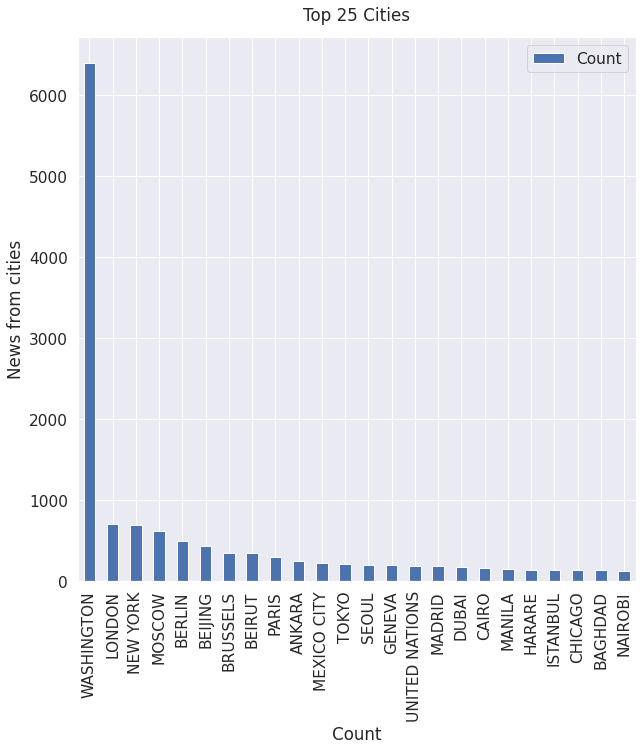

In [121]:
sns.set(font_scale=1.4)
df_cities = pd.DataFrame({'Cities':unique[:24], 'Count':counts[:24]})
ax = df_cities.plot(x='Cities', y='Count',kind='bar', figsize=(10, 10))
plt.xlabel("Count")
plt.ylabel("News from cities")
plt.title("Top 25 Cities", y=1.02);

In [33]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [ ]:
df.plot.bar(x='lab', y='val', rot=0)

In [ ]:
print("Record:",len(df))

Record: 44898


In [ ]:
X.head()

,title,text,subject
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News


In [ ]:
df.shape

(38639, 5)

In [ ]:
df['text'] = df['text'].str.strip()
df['text'] = df['text'].replace(r'^\s*$', np.nan, regex=True)

In [ ]:
# Remove all rows where complaints column is nan
df.dropna(subset=['text'], inplace=True)

In [ ]:
df_true.duplicated(subset=["text"]).value_counts()

False    21192
True       225
dtype: int64

In [ ]:
dup = df[df.duplicated(subset=["text"])]
dup.head()

,title,text,subject,date,label
9114,WHY THIS BLUE-COLLAR DEMOCRAT STRONGHOLD Count...,AP News The regulars amble in before dawn and...,politics,"Dec 27, 2017",Fake
9738,LEFTIST STORE OWNER Makes Video Asking Libs To...,Things didn t go as well as Nicholle had hoped...,politics,"Oct 6, 2017",Fake
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",Fake
10924,MEDIA IGNORES Time That Bill Clinton FIRED His...,"In its 109-year history, only one F.B.I. direc...",politics,"May 10, 2017",Fake
11146,TWITTER Posts Hilarious Images After Announcem...,Here s the original post by the Washington Pos...,politics,"Apr 13, 2017",Fake


In [ ]:
# print one duplicate entry
df[df['text'] == dup.iloc[100]['text']]

,title,text,subject,date,label
10268,HOW PRESIDENT TRUMP Can Remove Congress From T...,President Trump tweeted that he was considerin...,politics,"Jul 30, 2017",Fake
16001,HOW PRESIDENT TRUMP Can Remove Congress From T...,President Trump tweeted that he was considerin...,Government News,"Jul 30, 2017",Fake


In [ ]:
# drop duplicated data
df = df.drop_duplicates(subset={"text"}, keep='first', inplace=False)
df.shape

(38639, 5)

In [ ]:
# Checking for missing values in the dataset
df.isnull().sum()

In [ ]:
# dropping the nan values
df = df.fillna('')

In [ ]:
stopword_list = stopwords.words('english')
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
!pip install contractions

In [ ]:
import contractions
def decontracted(sentance):
    expanded_words = []    
    for word in sentance.split():
      # using contractions.fix to expand the shotened words
      expanded_words.append(contractions.fix(word))   

    expanded_text = ' '.join(expanded_words)
    return expanded_text

In [ ]:
def sentance_clean(sentance):
    # change sentence to lower case
    sentance = sentance.lower()
    # removing URL from sentence
    sentance = re.sub(r"http\S+", "", sentance)
    # removing HTML tags
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    # removing contraction of words from sentence   # call decontracted funtion for it
    sentance = decontracted(sentance)
    # removing digits
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    # removing special character
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    
    return sentance

In [ ]:
# Use Stemming 
ps = PorterStemmer()

# Performing the preprocessing steps on all messages
def preprocess(document):
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(document):
        # call sentance_clean function to clean text
        sentance = sentance_clean(sentance)
        # tokenize into words
        words = word_tokenize(sentance)
        # remove stop words
        tokens = [ps.stem(word) for word in words if word not in stopword_list]

        # join words to make sentence
        sentance = " ".join(tokens).strip()

        preprocessed_reviews.append(sentance)
        
    return preprocessed_reviews

In [ ]:
%%time
corpus = preprocess(df['text'])

100%|██████████| 38639/38639 [07:07<00:00, 90.47it/s]

CPU times: user 7min 2s, sys: 2.88 s, total: 7min 5s
Wall time: 7min 7s


In [ ]:
print("Before preprocess\n", df['text'][12])
print("***"*40)
print("After preprocess\n", corpus[12])

Before preprocess
 12    Republicans have had seven years to come up wi...
12    The following statements were posted to the ve...
Name: text, dtype: object
************************************************************************************************************************
After preprocess
 republican seven year come viabl replac obamacar fail miser take victori lap gift wealthi tax break wednesday donald trump look camera said essenti repeal obamacar come someth much better obamacar repeal bill ad well like thing trump say true former realiti show star could done order erad former presid obama signatur legisl would without offer altern senat major leader mitch mcconnel told npr bipartisan year hope new year go pivot becom cooper obamacar repeal doa well obvious unabl complet repeal replac senat kentucki republican said take look look like senat think probabl move issu npr report mcconnel hope focu instead stabil insur marketplac keep premium skyrocket earli month promis made moder

In [ ]:
df['text'] = corpus

In [ ]:
# Seperating the data and the label 
x = df['text'].values
y = df['label'].values

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf_vectorizer.fit_transform(x)

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (30911, 5000)
Test size: (7728, 5000)


In [ ]:
def plot_confusion_matrix(y_actual, y_pred):
    '''
    This method plots confusion matrix.
    '''
    classes = ['Fake News', 'Real News']
    tick_marks = np.arange(len(classes))

    accuracy = accuracy_score(y_actual, y_pred)
    print("Accuracy score:", "{:2.3}".format(accuracy))

    conf_matrix = confusion_matrix(y_actual, y_pred)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')
    
    plt.tight_layout()
    plt.xticks(tick_marks , classes, rotation=0)
    plt.yticks(tick_marks , classes)
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix', fontsize=12)
    plt.show()

In [ ]:
metrics_dict = {}

In [ ]:
#  logistic regression object
model = LogisticRegression(C=5)
model.fit(X_train, y_train)

LogisticRegression(C=5)

In [ ]:
# predict on train data
X_train_predict = model.predict(X_train)
# train_accuracy
train_accuracy = accuracy_score(y_train, X_train_predict)

# predict on test data
X_test_predict = model.predict(X_test)
# test_accuracy
test_accuracy = accuracy_score(y_test, X_test_predict)

In [ ]:
accuracy = accuracy_score(y_test, X_test_predict)
LR_TF_TFIDF = {'Vectorizer': 'TF-IDF', 'Algorithm': 'Logistic_Regression_1', 
               'Train Accuracy':train_accuracy, 'Test Accuracy':test_accuracy}
metrics_dict['Logistic_Regression_TF_IDF'] = LR_TF_TFIDF

Accuracy score: 0.991


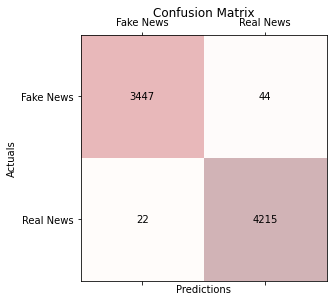

In [ ]:
# plot confusion matrix on test
plot_confusion_matrix(y_test, X_test_predict)

In [ ]:
print(classification_report(list(y_test),X_test_predict))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      3491
        True       0.99      0.99      0.99      4237

    accuracy                           0.99      7728
   macro avg       0.99      0.99      0.99      7728
weighted avg       0.99      0.99      0.99      7728



------------------------------------------------------------------------------------------

In [ ]:
#Naive Bayes
nb_model = MultinomialNB(alpha=0.8)
nb_model.fit(X_train, y_train)

MultinomialNB(alpha=0.8)

In [ ]:
# predict on train data
X_train_predict = nb_model.predict(X_train)
# train_accuracy
train_accuracy = accuracy_score(y_train, X_train_predict)

# predict on test data
X_test_predict = nb_model.predict(X_test)
# test_accuracy
test_accuracy = accuracy_score(y_test, X_test_predict)

In [ ]:
NB_TF_TFIDF = {'Vectorizer': 'TF-IDF', 'Algorithm': 'Naive_Bayes_1', 
               'Train Accuracy':train_accuracy, 'Test Accuracy':test_accuracy}
metrics_dict['Naive_Bayes_TF_IDF'] = NB_TF_TFIDF

Accuracy score: 0.941


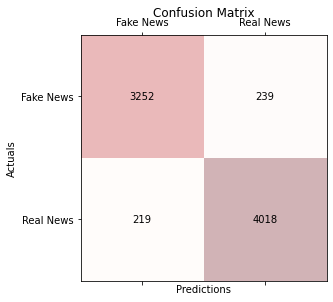

In [ ]:
plot_confusion_matrix(y_test, X_test_predict)

In [ ]:
def metrics_table(metrics_dict):
    '''
    Metrics evolution table.
    '''   
    df = []
    for key, value in metrics_dict.items():
        df.append(metrics_dict[key])
    df = pd.DataFrame(df)
    df.set_index('Algorithm', inplace=True)
    return df

In [ ]:
print(classification_report(list(y_test),X_test_predict))

              precision    recall  f1-score   support

        Fake       0.94      0.93      0.93      3491
        True       0.94      0.95      0.95      4237

    accuracy                           0.94      7728
   macro avg       0.94      0.94      0.94      7728
weighted avg       0.94      0.94      0.94      7728



In [ ]:
metrics_table(metrics_dict)

,Vectorizer,Train Accuracy,Test Accuracy
Algorithm,,,
Logistic_Regression_1,TF-IDF,0.997121,0.991460
Naive_Bayes_1,TF-IDF,0.946427,0.940735
